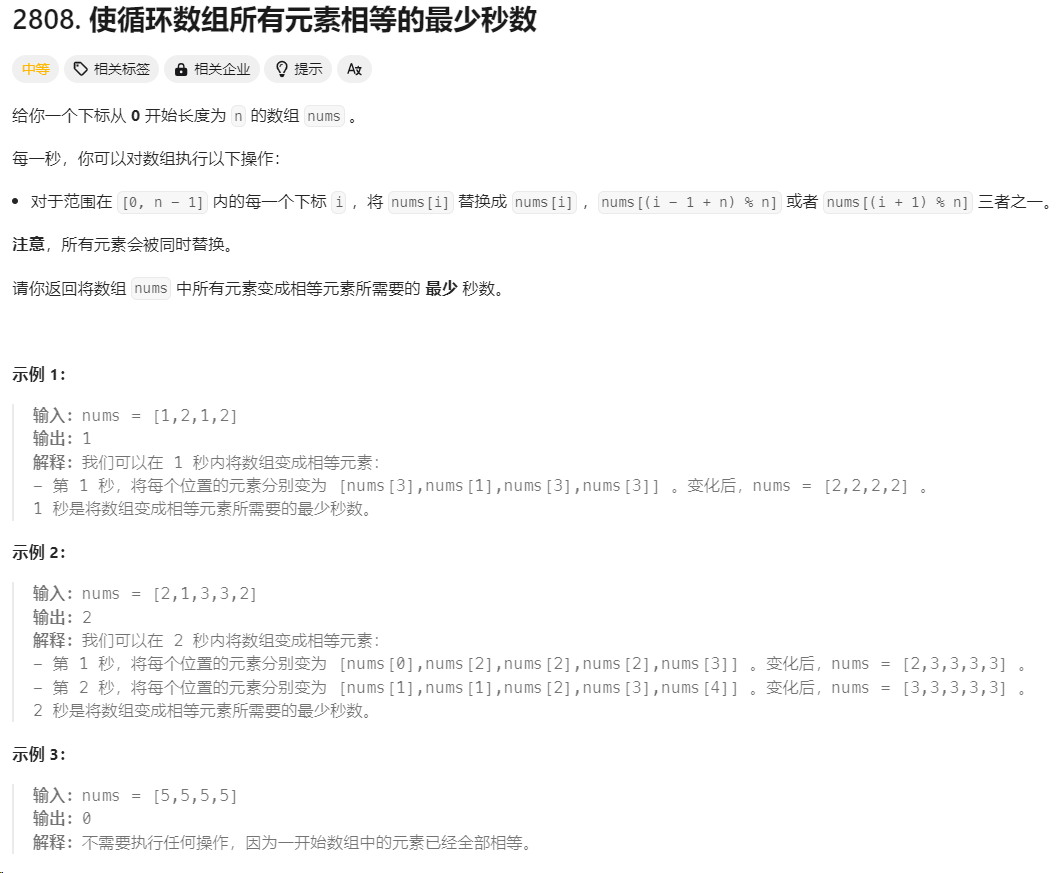

思路：散列表  
问题实际是在求两个重复元素之间的最大距离  
如例2：2 1 3 3 2 之间的最大距离为3 即第一个3向负方向前进三个距离到达最后一个3  
而最大距离不一定是负方向的  
假设例子变为：1 2 3 1 5 2。22之间的距离又变成了正向的 也是3 因此计算最大距离时要考虑两个方向  
那么这两个距离如何计算？  
最大的负向距离一定发生在第一个元素和最后一个元素之间 因此 最大负向距离 = firstIndex - lastIndex + n  
最大的正向距离则需要相邻两者进行计算了 NextIndex-PreIndex  
对所有的nums元素都进行最大距离计算，然后通过  max//2即可计算到每个重复元素需要的最小时间 例如例2： 4//2 = 2  
最后取这些最小时间的最小值即可

In [1]:
from typing import List
from collections import defaultdict
class Solution:
    def minimumSeconds(self, nums: List[int]) -> int:
        # 创建一个value为list的字典 key为nums的元素
        mp = defaultdict(list)
        # 初始化最小时间
        res = n = len(nums)
        # 遍历所有的nums元素 将nums[i]设为k 将index追加到列表里
        for i,a in enumerate(nums):
            mp[a].append(i)
        # 遍历列表的所有v 每个v为一个列表 记录了相同元素所在的index
        for pos in mp.values():
            # 最大距离初始设置为第一个index和最后一个index1的反向距离
            mx = pos[0] + n - pos[-1]
            # 依次计算某个nums元素的正向距离
            for i in range(len(pos)):
                mx = max(mx, pos[i] - pos[i - 1])
            res = min(res, mx // 2)
        return res

In [2]:
Solution().minimumSeconds(nums = [2,1,3,3,2])

2

In [3]:
Solution().minimumSeconds(nums = [1,2,3,1,5,2])

1